# One layer Neural Network

Welcome to programming assignment! You will build a one layer neural network classifier to recognize  cats.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.
- for part 1-7 do not use torch framework. You need to use only numpy library

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
# the lr_utils file exist in the Canvas files
from lr_utils import load_dataset
import cv2
%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [30]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


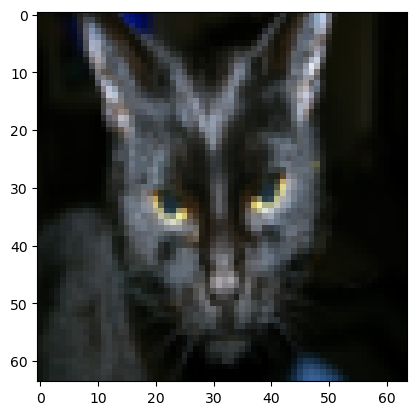

In [31]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")



**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [32]:
### START CODE HERE ### (≈ 3 lines of code)
#print(train_set_x_orig.shape)
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output for m_train, m_test and num_px**:
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td>
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td>
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td>
  </tr>
  
</table>


the first image shape in the dataset =torch.Size([64, 64, 3]) The label is = 0

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [33]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

#print(train_set_x_flatten[1].shape)

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**:

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td>
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td>
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td>
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td>
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td>
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !-->

Let's standardize our dataset.

In [34]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

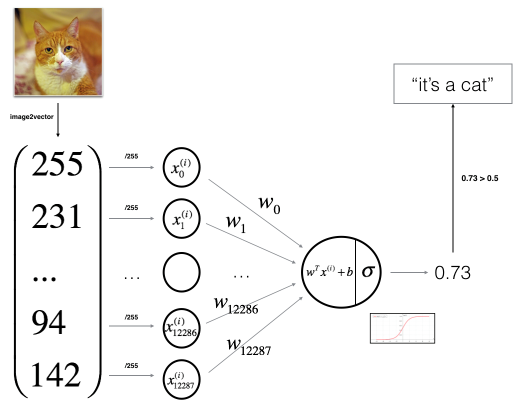

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [35]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###

    return s

In [36]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**:

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td>
  </tr>
</table>

### 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [37]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w =np.zeros((dim,1))
    b =0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [38]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**:


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [50]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    
 
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    print(X.shape)
    print(w.T.shape)
    A = sigmoid(np.dot(w.T,X)+b)
    print(A.shape)
    print(type(A))
    # compute activation
    cost = (-1/m)*np.sum((Y*np.log(A))+((1-Y)*(np.log(1-A))))                        # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw =1/m*np.dot(X,(A-Y).T)
    db =1/m*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [51]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

(2, 3)
(1, 2)
(1, 3)
<class 'numpy.ndarray'>
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### d) Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [22]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [23]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


**Expected Output**:
<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591]
 [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>
</table>

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this).

In [25]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    Y_prediction = np.where(A>0.5, 1, 0)
    ### END CODE HERE ###
    #for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)

    #Y_prediction =
        ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [26]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1 1 0]]


**Expected Output**:

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [52]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    ### START CODE HERE ###

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Run the following cell to train your model.

    print(X.shape)
    print(w.T.shape)
    A = sigmoid(np.dot(w.T,X)+b)
    print(A.shape)
    print(type(A))

In [53]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
Cost after iteration 0: 0.693147
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'>
(12288, 209)
(1, 12288)
(1, 209)
<class 'numpy.ndarray'

KeyboardInterrupt: 

**Expected Output**:train accuracy: 99.04306220095694 %
test accuracy: 70.0 %

**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

In [19]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print(classes)
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0][index])].decode("utf-8") +  "\" picture.")

NameError: name 'test_set_x' is not defined

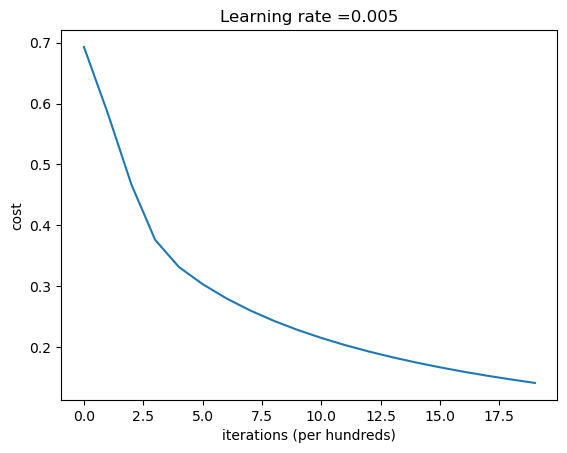

In [23]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## 7 - Test with your own image (optional/ungraded exercise) ##

You can use your own image and see the output of your model. To do that:
    1. Provide the path to your image in the following code
    2. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [28]:
## START CODE HERE ## (PUT YOUR IMAGE NAME)
my_image =   # change this to the name of your image file
## END CODE HERE ##
# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(cv2.imread(fname,1))
print(image.shape)
my_image = np.resize(image, (num_px,num_px,3)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

SyntaxError: invalid syntax (1426175034.py, line 2)

# Multi Layer Neural Network in Pytorch

**the goal of this lab is classify the fashion mnist dataset**


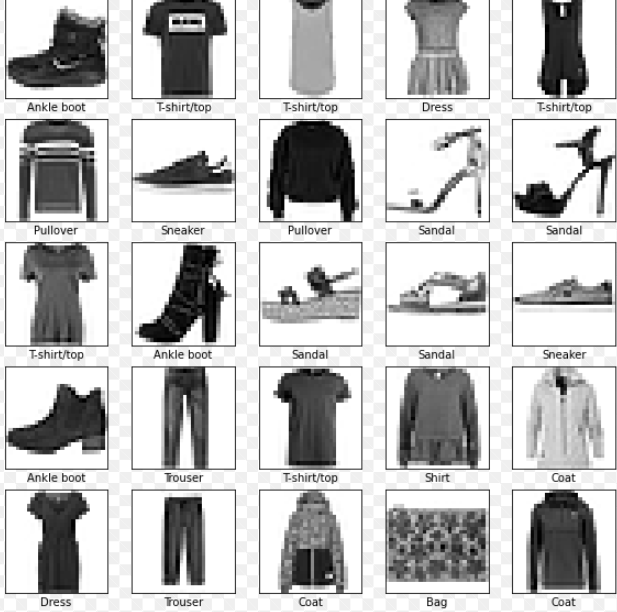

**Import Packages**

- torchvisoin is a library that contain helper functions to create dataset and perform preprocessing on the data

In [16]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from lr_utils import load_dataset
import time

**Exercise: create dataset and dataloader in torch**

In [11]:
## START CODE HERE ##
# Define a transform to normalize the data (use transform.compose([]) and tramsforms.Normalize the mean and std is 0.5 for fashion mnist dataset)
transformo = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),
   # transforms.Resize((28,28)),
    #transforms.ToDtype(torch.float32)
])

# Download and load the training data using dataset


trainset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transformo
)

testset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transformo
)
    

#train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
# create train and test loader with batch size 64 (use torch.utils.data)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, pin_memory=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, pin_memory=True)



## END CODE HERE ##

In [12]:
# Examine a sample
dataiter = iter(trainloader)
images,labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


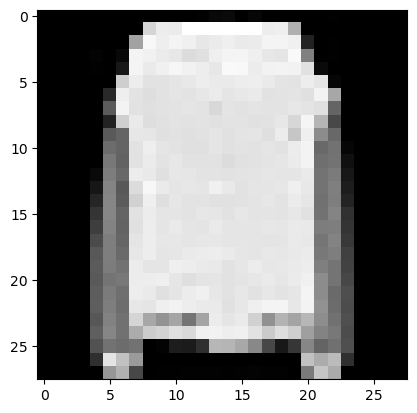

In [38]:

plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

**Define the architecture of the neural network**

PyTorch is a powerful deep learning framework, and one of its core components is the torch.nn module. The nn module is designed to make building and training neural networks easier by providing a collection of commonly used neural network layers, loss functions, and utilities.

At the heart of deep learning models are layers, which are the building blocks that transform inputs and learn patterns from data. One of the simplest and most fundamental layers is the linear layer, also known as a fully connected layer or dense layer. In PyTorch, the **nn.Linear** function is used to create these layers.

Linear Layers with nn.Linear
A linear layer performs a linear transformation on the input data, defined mathematically as:

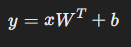

This means that each output is a weighted sum of the inputs plus a bias. Linear layers are a key part of neural networks because they allow the model to learn relationships between inputs and outputs.

In PyTorch, you can easily define a linear layer using the nn.Linear class. Here’s an example:


**import torch.nn as nn**


\# Create a linear layer that takes 5 inputs and produces 3 outputs

**linear_layer = nn.Linear(in_features=5, out_features=3)**

**Task:** In the next cell please define a neural network whose details are given in the image below:

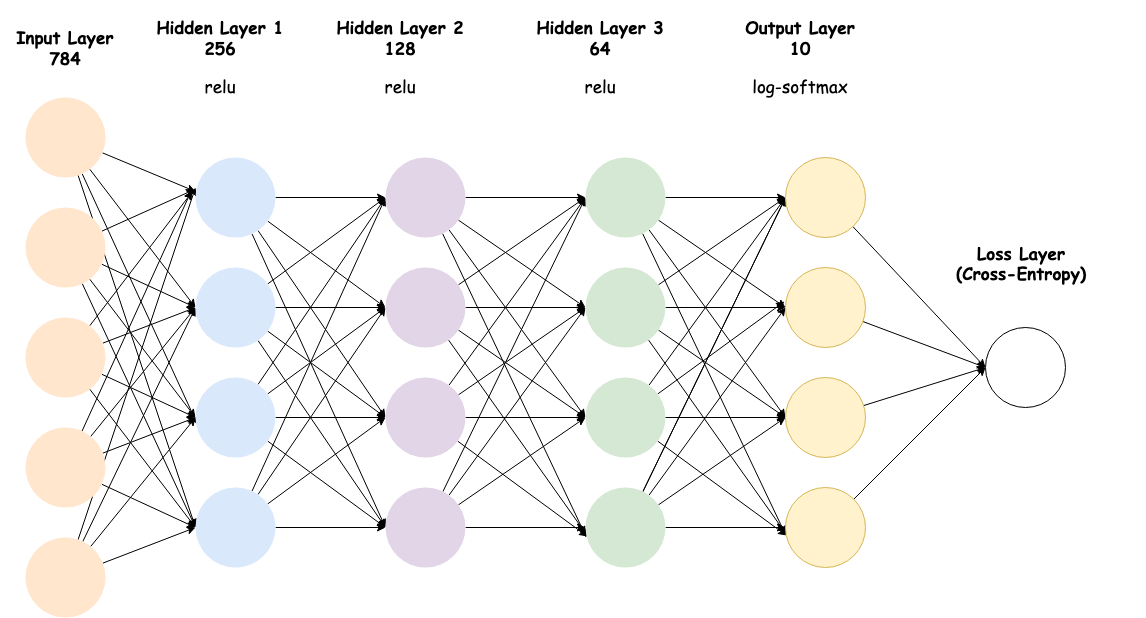

In [38]:

from torch import nn, optim
import torch.nn.functional as F

### FASHION MODEL ### Sindy Crawwwford

class Mymodel (nn.Module):
    def __init__(self) -> None:
        super(Mymodel,self).__init__()
        ## START CODE HERE ##
        self.linear1 = nn.Linear(in_features=784,out_features=256)          # add linear layer with (784,256) neurons as dimension of input features and the dimension of the first hidden layer
        self.dropout1 = nn.Dropout(0.3)
        self.linear2 = nn.Linear(in_features=256,out_features=128)          # add linear layer with (562,128) neurons
        self.dropout2 = nn.Dropout(0.3)
        self.linear3 = nn.Linear(in_features=128,out_features=64)          # add linear layer with (128,64) neurons
        self.dropout3 = nn.Dropout(0.3)
        self.linear4 = nn.Linear(in_features=64,out_features=10)          # add linear layer with (64,10) neurons
        ## END CODE HERE ##
    def forward(self, x, droupout = False):
        ## START CODE HERE ##
        # impliment forward propagatoin ( consider F.relu activation function)
        if droupout:
            x = F.relu(self.linear1(x))
            x = self.dropout1(x)
            x = F.relu(self.linear2(x))
            x = self.dropout2(x)
            x = F.relu(self.linear3(x))
            x = self.dropout3(x)
            x = self.linear4(x)
        else:
            x = F.relu(self.linear1(x))
            x = F.relu(self.linear2(x))
            x = F.relu(self.linear3(x))
            x = self.linear4(x)
        return x   ## END CODE HERE ##
      

model = Mymodel()

print(model)

Mymodel(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (linear4): Linear(in_features=64, out_features=10, bias=True)
)


**Define loss function, Optimizer, and create training loop**

In [39]:
# Define the loss as cross-entropy with logits loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.0001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

# Define the number of epochs
epochs = 30
train_losses, test_losses = [], []
begin = time.time()

for e in range(epochs):
    running_loss = 0
    epoch_start = time.time()
    for images, labels in trainloader:
        # Flatten images into a vector
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        
        # Flatten the input images into a 1D tensor
        images = images.view(images.shape[0], -1)
        #print(images.shape)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        output = model.forward(images, droupout = False)
        #print(output.shape)

        # Compute loss
        loss = criterion(output, labels)

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computation
        with torch.no_grad():
            model.eval()  # Set the model to evaluation mode
            
            # Validation pass
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                images = images.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True)
                #print("HEJHEJ!")
                # Get model predictions
                log_ps = model(images)

                # Compute validation loss
                test_loss += criterion(log_ps, labels)

                # Get the predicted class by applying sigmoid and rounding to 0 or 1
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim = 1)

                # Calculate accuracy
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()  # Set the model back to training mode
        train_losses.append(running_loss / len(trainloader))
        test_losses.append(test_loss / len(testloader))
        epoch_end = time.time()

        print(f"Epoch: {e+1}/{epochs}..",
              f"Training loss: {running_loss/len(trainloader):.3f}..",
              f"Test loss: {test_loss/len(testloader):.3f}..",
              f"Test Accuracy: {accuracy/len(testloader):.3f}..",
              f"Epoch Time: {epoch_end-epoch_start:.1f}s..",
              f"Tot Time: {(epoch_end-begin)//60:.0f}m {(epoch_end-begin)%60:.1f}s")
    

cpu
Epoch: 1/30.. Training loss: 0.657.. Test loss: 0.524.. Test Accuracy: 0.811.. Epoch Time: 7.0s.. Tot Time: 0m 7.0s
Epoch: 2/30.. Training loss: 0.474.. Test loss: 0.469.. Test Accuracy: 0.831.. Epoch Time: 7.4s.. Tot Time: 0m 14.5s
Epoch: 3/30.. Training loss: 0.428.. Test loss: 0.455.. Test Accuracy: 0.837.. Epoch Time: 8.2s.. Tot Time: 0m 22.7s
Epoch: 4/30.. Training loss: 0.402.. Test loss: 0.418.. Test Accuracy: 0.849.. Epoch Time: 8.7s.. Tot Time: 0m 31.3s
Epoch: 5/30.. Training loss: 0.380.. Test loss: 0.404.. Test Accuracy: 0.854.. Epoch Time: 8.9s.. Tot Time: 0m 40.2s
Epoch: 6/30.. Training loss: 0.364.. Test loss: 0.402.. Test Accuracy: 0.857.. Epoch Time: 10.7s.. Tot Time: 0m 50.9s
Epoch: 7/30.. Training loss: 0.350.. Test loss: 0.391.. Test Accuracy: 0.855.. Epoch Time: 9.8s.. Tot Time: 1m 0.7s
Epoch: 8/30.. Training loss: 0.338.. Test loss: 0.381.. Test Accuracy: 0.866.. Epoch Time: 8.8s.. Tot Time: 1m 9.4s
Epoch: 9/30.. Training loss: 0.327.. Test loss: 0.365.. Test A

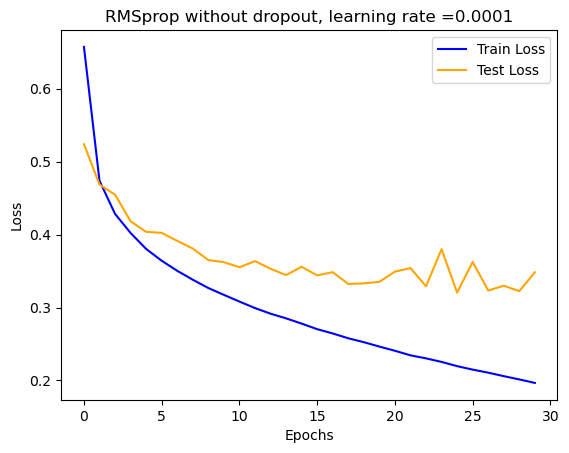

In [40]:

plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='orange')
#plt.plot(accuracy, label='Accuracy', color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("RMSprop with dropout = 0.2, learning rate =" + str(0.0001))
plt.legend()
plt.show()

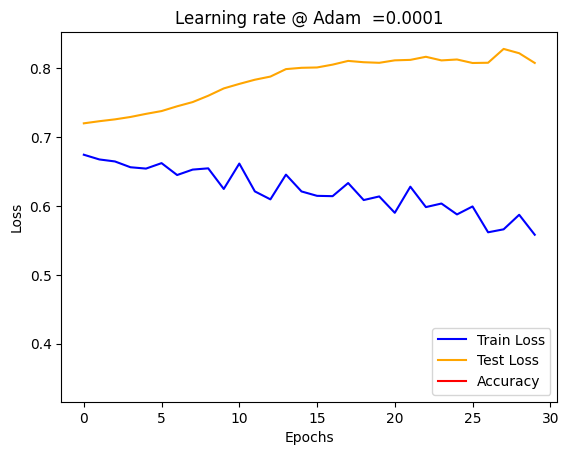

In [142]:

plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.plot(accuracy, label='Accuracy', color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Learning rate @ Adam  =" + str(0.0001))
plt.legend()
plt.show()

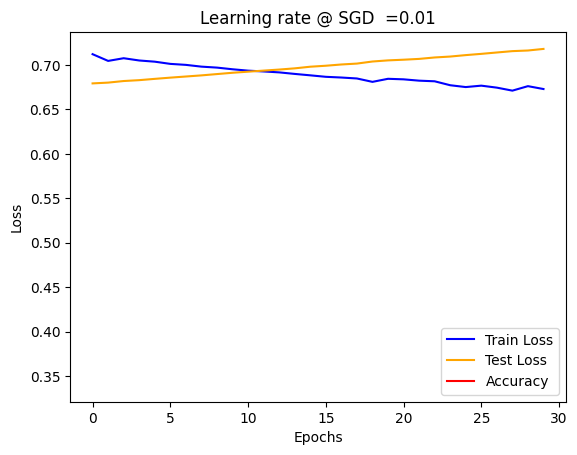

In [130]:

plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.plot(accuracy, label='Accuracy', color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Learning rate @ SGD  =" + str(0.01))
plt.legend()
plt.show()

**ADD dropout to each linear layer with probability 0.2 and create and train model again**

The dropout function in pytorch can be obtained also from the nn module nn.Dropout(probability=0.3). It is used to introduce regularization into your module so that it does not overfit on your training data.

###FOR THE CATS!!###

In [42]:

from torch.utils.data import Dataset



# Custom dataset class for HDF5 dataset
class CustomCatDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[0,idx]
        if self.transform:
            image = self.transform(image)
        return image, label


# Define transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    #transforms.Resize((28, 28)),
    #transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize((0.5,), (0.5,))
])


# Load dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Create datasets
trainset = CustomCatDataset(train_set_x_orig, train_set_y, transform=transform)
testset = CustomCatDataset(test_set_x_orig, test_set_y, transform=transform)

# Create DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True) #drop_last=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False) #drop_last=True)



# Examine a sample
dataiter = iter(trainloader)
images,labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 3, 64, 64])
torch.Size([128])


In [53]:
from torch import nn, optim
import torch.nn.functional as F

#### ANVÄND DEN HÄR #####

class Mymodel (nn.Module):
    def __init__(self) -> None:
        super(Mymodel,self).__init__()
        ## START CODE HERE ##
        self.linear1 = nn.Linear(in_features=12288,out_features=6644)           # add linear layer with (784,256) neurons as dimension of input features and the dimension of the first hidden layer
        self.dropout1 = nn.Dropout(0.3)         # define droput l ayer with probability 0.2
        self.linear2 = nn.Linear(in_features=6644,out_features=3322)           # add linear layer with (256,128) neurons
        self.dropout2 = nn.Dropout(0.3)          # define droput layer with probability 0.2
        self.linear3 = nn.Linear(in_features=3322,out_features=1661)           # add linear layer with (128,64) neurons
        self.dropout3 = nn.Dropout(0.3)          # define droput layer with probability 0.2
        self.linear4 = nn.Linear(in_features=1661,out_features=512)           # add linear layer with (64,10) neurons
        self.dropout4 = nn.Dropout(0.3)          # define droput layer with probability 0.2
        self.linear5 = nn.Linear(in_features=512,out_features=64)           # add linear layer with (64,10) neurons
        self.dropout5 = nn.Dropout(0.3)          # define droput layer with probability 0.2
        self.linear6 = nn.Linear(in_features=64,out_features=1)           # add linear layer with (64,10) neurons
       

        ## END CODE HERE ##
    def forward(self, x, droupout = False):
         ## START CODE HERE ##
         # impliment forward propagatoin ( consider F.relu activation function) use dropout layers in the forward
        if droupout:
            x = F.relu(self.linear1(x))
            x = self.dropout1(x)
            x = F.relu(self.linear2(x))
            x = self.dropout2(x)
            x = F.relu(self.linear3(x))
            x = self.dropout3(x)
            x = F.relu(self.linear4(x))
            x = self.dropout4(x)
            x = F.relu(self.linear5(x))
            x = self.dropout5(x)
            x = self.linear6(x)
        else:
            x = F.relu(self.linear1(x))
            x = F.relu(self.linear2(x))
            x = F.relu(self.linear3(x))
            x = F.relu(self.linear4(x))
            x = F.relu(self.linear5(x))
            x = self.linear6(x)
        return x
        ## END CODE HERE ##
model = Mymodel()


print(model)

Mymodel(
  (linear1): Linear(in_features=12288, out_features=6644, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (linear2): Linear(in_features=6644, out_features=3322, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (linear3): Linear(in_features=3322, out_features=1661, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (linear4): Linear(in_features=1661, out_features=512, bias=True)
  (dropout4): Dropout(p=0.3, inplace=False)
  (linear5): Linear(in_features=512, out_features=64, bias=True)
  (dropout5): Dropout(p=0.3, inplace=False)
  (linear6): Linear(in_features=64, out_features=1, bias=True)
)


In [54]:
# Define the loss as binary cross-entropy with logits loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.0001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

# Define the number of epochs
epochs = 30
train_losses, test_losses = [], []
begin = time.time()

for e in range(epochs):
    running_loss = 0
    epoch_start = time.time()
    for images, labels in trainloader:
        # Flatten images into a vector
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True).view(-1, 1) 
        # Flatten the input images into a 1D tensor
        images = images.view(images.shape[0], -1)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        output = model.forward(images, droupout = True)

        # Compute loss
        loss = criterion(output, labels.float())  # Labels need to be float for BCEWithLogitsLoss

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computation
        with torch.no_grad():
            model.eval()  # Set the model to evaluation mode

            for images, labels in testloader:
                images = images.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True).view(-1, 1)  # Ensure labels are [batch_size, 1]

                # Flatten images into 1D vector
                images = images.view(images.shape[0], -1)

                # Get model predictions
                log_ps = model(images)

                # Compute validation loss
                test_loss += criterion(log_ps, labels.float()).item() 

                # Get the predicted class by applying sigmoid and rounding to 0 or 1
                ps = torch.sigmoid(log_ps)
                pred = (ps > 0.5).float()

                # Calculate accuracy
                equals = pred == labels
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()  # Set the model back to training mode
        train_losses.append(running_loss / len(trainloader))
        test_losses.append(test_loss / len(testloader))
        epoch_end = time.time()

        print(f"Epoch: {e+1}/{epochs}..",
              f"Training loss: {running_loss/len(trainloader):.3f}..",
              f"Test loss: {test_loss/len(testloader):.3f}..",
              f"Test Accuracy: {accuracy/len(testloader):.3f}..",
              f"Epoch Time: {epoch_end-epoch_start:.1f}s..",
              f"Tot Time: {(epoch_end-begin)//60:.0f}m {(epoch_end-begin)%60:.1f}s")
    

cpu
Epoch: 1/30.. Training loss: 1.010.. Test loss: 0.680.. Test Accuracy: 0.520.. Epoch Time: 1.5s.. Tot Time: 0m 1.5s
Epoch: 2/30.. Training loss: 0.674.. Test loss: 1.000.. Test Accuracy: 0.340.. Epoch Time: 1.2s.. Tot Time: 0m 2.6s
Epoch: 3/30.. Training loss: 0.661.. Test loss: 0.860.. Test Accuracy: 0.340.. Epoch Time: 1.2s.. Tot Time: 0m 3.8s
Epoch: 4/30.. Training loss: 0.635.. Test loss: 0.873.. Test Accuracy: 0.340.. Epoch Time: 1.3s.. Tot Time: 0m 5.1s
Epoch: 5/30.. Training loss: 0.682.. Test loss: 0.746.. Test Accuracy: 0.340.. Epoch Time: 1.2s.. Tot Time: 0m 6.3s
Epoch: 6/30.. Training loss: 0.664.. Test loss: 0.777.. Test Accuracy: 0.340.. Epoch Time: 1.3s.. Tot Time: 0m 7.6s
Epoch: 7/30.. Training loss: 0.633.. Test loss: 0.912.. Test Accuracy: 0.340.. Epoch Time: 1.2s.. Tot Time: 0m 8.9s
Epoch: 8/30.. Training loss: 0.650.. Test loss: 0.745.. Test Accuracy: 0.340.. Epoch Time: 1.3s.. Tot Time: 0m 10.2s
Epoch: 9/30.. Training loss: 0.638.. Test loss: 0.825.. Test Accura

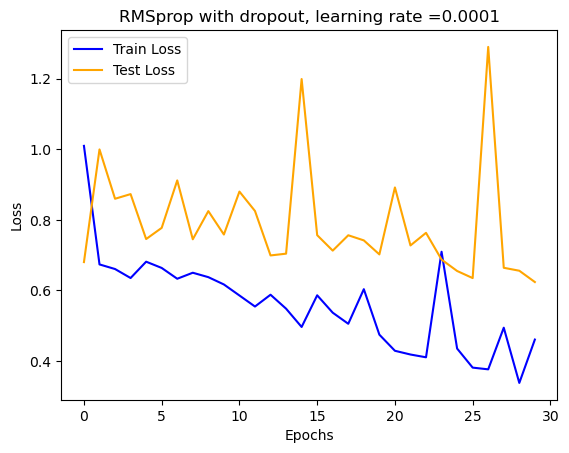

In [55]:
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='orange')
#plt.plot(accuracy, label='Accuracy', color='red')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("RMSprop with dropout, learning rate =" + str(0.0001))
plt.legend()
plt.show()

**Use the training loop that implimented in the above cells to train the model with dropout and compare it with previous model**

##Exercise##
start text here
Explain the accuracy and loss difference between two models in the following  cell:





**Your answer:**

**To learn the concepts presented in the lecture please use different loss functions, optimizer, learning rate and run again the code to see the diffrence and impact of each configuration**

Good links to find the problems:
-[https://pytorch.org/tutorials/]

# Quiz for your Report



**Use the same neural network with dropouts for the cats dataset defined in the start of this notebook and plot the loss curve and report the train and test accuracies.**

**Change the optimizer in the code to [SGD,Adam,RMSprop] and plot the loss function (cost function) per iteration and add the plots to your report. In your report you need to specify which optimizer is better.**